In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics


In [53]:
df = pd.read_csv("/Users/blakemidgley/Downloads/diabetes.csv")

In [11]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [55]:
data.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
data.isnull().sum()
#checking for any null values in the data

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

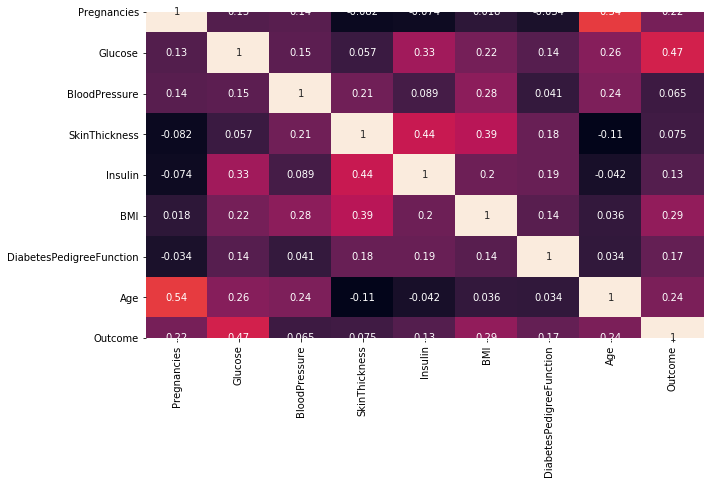

In [56]:
df_cr=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(df_cr,annot=True,cbar=False)
plt.show()
#establishing correlation/strength of correlation with confirmed cases of diabetes 

In [57]:
from scipy import stats
df_n2=df[['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']]
df_new=df_n2[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df_new.describe()
#getting rid of outliers and excluding negligable variables

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,3.845930,120.293605,72.507267,32.209157,0.454555,33.094477,0.329942
std,3.279256,30.005790,90.106939,6.618891,0.284527,11.436990,0.470534
min,0.000000,44.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,0.000000,27.400000,0.245000,24.000000,0.000000
50%,3.000000,115.000000,43.500000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,139.000000,126.000000,36.300000,0.605500,40.000000,1.000000
max,13.000000,199.000000,415.000000,55.000000,1.461000,68.000000,1.000000


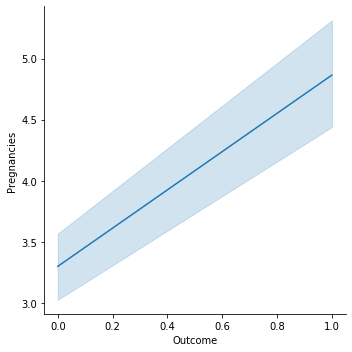

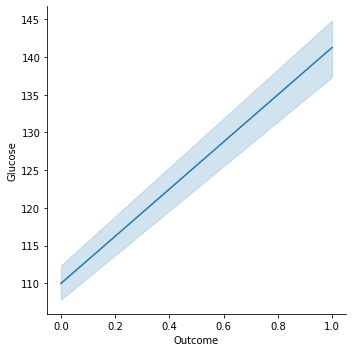

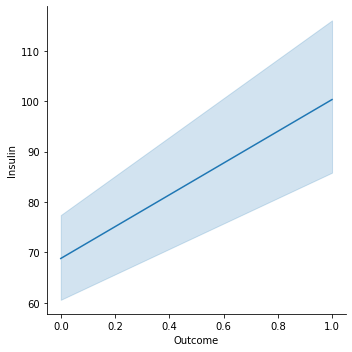

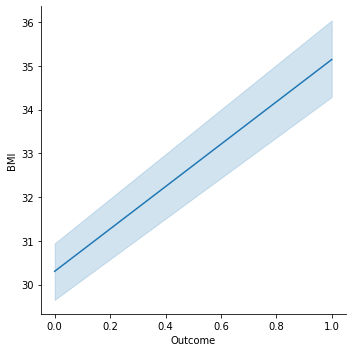

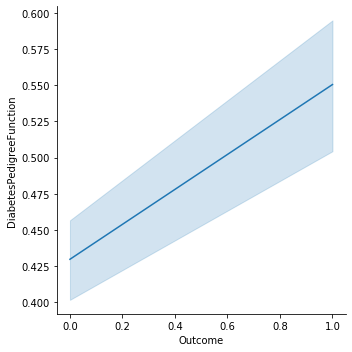

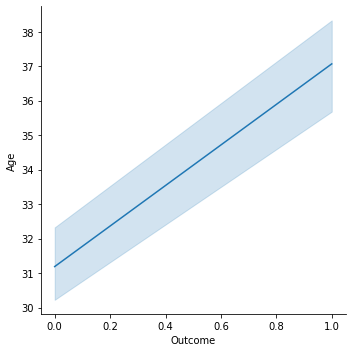

In [58]:
sns.relplot(x="Outcome", y="Pregnancies", kind='line', data=data)
sns.relplot(x="Outcome", y="Glucose", kind='line', data=data)
sns.relplot(x="Outcome", y="Insulin", kind='line', data=data)
sns.relplot(x="Outcome", y="BMI", kind='line', data=data)
sns.relplot(x="Outcome", y="DiabetesPedigreeFunction", kind='line', data=data)
sns.relplot(x="Outcome", y="Age", kind='line', data=data)
#analyzing the relationship of each dependent variable with Outcome

In [109]:
x=df.loc[:,['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction', 'Age']].values
y=df.loc[:,'Outcome'].values
#creating test and train data sets

In [115]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40)


In [111]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)
#running linear regression

-0.9243207411888301
[ 0.02291967  0.00610402 -0.00025846  0.01155971  0.13776784  0.00074611]


In [116]:
y_pred = regressor.predict(X_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)
#showing difference between actual and different

     Actual  Predicted
0         0   0.210028
1         0   0.162035
2         0   0.200385
3         0  -0.063257
4         0   0.618062
..      ...        ...
303       1   0.387337
304       0   0.471109
305       1   0.620468
306       1   0.446639
307       0   0.335548

[308 rows x 2 columns]


In [117]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#checking accuracy

Mean Absolute Error: 0.3315719898454076
Mean Squared Error: 0.1566085607867932
Root Mean Squared Error: 0.395737995126565
